In [1]:
### RDKit
"""
RDKit is an open-source cheminformatics toolkit. We will go through some of the most useful RDKit functionalities:

1.Reading and writing
2.Descriptors
3.Fingerprints
"""

'\nRDKit is an open-source cheminformatics toolkit. We will go through some of the most useful RDKit functionalities:\n\n1.Reading and writing\n2.Descriptors\n3.Fingerprints\n'

In [2]:
## Reading and writing 
"""
There are many ways to represent chemical structures. As chemists, we are familiar with IUPAC names and line 
drawings. As cheminformaticists, we need representations that work with computers. Some common text-based 
representations include SMILES (Simplified Molecular Input Line Entry System), a variant on SMILES called 
SELFIES (Self-Referencing Embedded Strings), and InChi (International Chemical Identifier).
"""

# Let's make our first molecule from smiles.

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

# IPythonConsole est utilisé pour affiché les structures moléculaires
# représentation SVG (Scalable Vector Graphics qui est un format) pour afficher les structures moléculaires dans l'environnement IPython
ethanol = Chem.MolFromSmiles("CCO") # Ethanol --> rechercher sur pubchem le smile
print(ethanol)

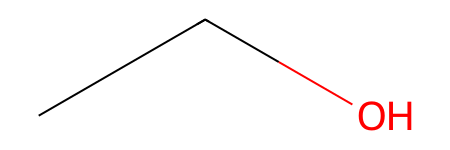

In [3]:
# rdkit is built around this Mol object. We can see the structure as follows:

ethanol

In [4]:
## SMILES crash course
"""
In chemical structures represented by SMILES notation:

-Atoms are denoted by their atomic symbols.
-Bonds between adjacent atoms are typically single unless specified otherwise (double bonds are indicated by 
'=', triple bonds by '#', and explicit single bonds by '-').
-Any unfilled valency is assumed to be filled with hydrogen atoms. For instance, "C" represents methane (CH4) 
and "O" represents water (H2O)
-Branches are encapsulated within parentheses. For example, (CC) represents an ethyl group.
-Rings are formed by breaking them at an arbitrary point and labeling atoms to indicate connectivity. 
For instance, C1CCCCC1 represents cyclohexane.
-Aromatic compounds can be depicted explicitly (e.g., benzene as C1=CC=CC=C1) or with lowercase letters 
(e.g., c1ccccc1).

A nice introductory tutorial can be found here: https://chemicbook.com/2021/02/13/smiles-strings-explained-for-beginners-part-1.html

The daylight documentation can be found here: https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

Experiment with smiles notation. Can you write the smiles for 1-butanol? Tert-butanol? As a challenge, write the smiles for vanillin.
"""

'\nIn chemical structures represented by SMILES notation:\n\n-Atoms are denoted by their atomic symbols.\n-Bonds between adjacent atoms are typically single unless specified otherwise (double bonds are indicated by \n\'=\', triple bonds by \'#\', and explicit single bonds by \'-\').\n-Any unfilled valency is assumed to be filled with hydrogen atoms. For instance, "C" represents methane (CH4) \nand "O" represents water (H2O)\n-Branches are encapsulated within parentheses. For example, (CC) represents an ethyl group.\n-Rings are formed by breaking them at an arbitrary point and labeling atoms to indicate connectivity. \nFor instance, C1CCCCC1 represents cyclohexane.\n-Aromatic compounds can be depicted explicitly (e.g., benzene as C1=CC=CC=C1) or with lowercase letters \n(e.g., c1ccccc1).\n\nA nice introductory tutorial can be found here: https://chemicbook.com/2021/02/13/smiles-strings-explained-for-beginners-part-1.html\n\nThe daylight documentation can be found here: https://www.dayli

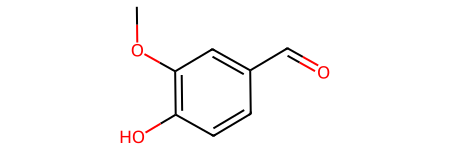

In [5]:
butanol = "CCCCO"
tertbutanol = "CC(C)(C)O"
vanillin = "c1(O)c(OC)cc(C=O)cc1"

Chem.MolFromSmiles(vanillin)

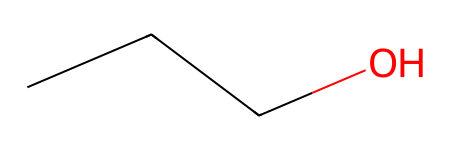

In [6]:
Chem.MolFromSmiles(butanol)

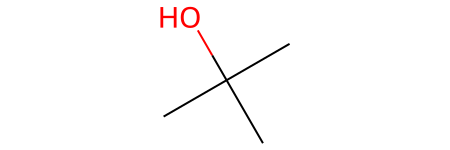

In [7]:
Chem.MolFromSmiles(tertbutanol)

In [10]:
"""
The fact that multiple SMILES can represent the same molecule can cause confusion when you're trying to 
search a database. To deal with this, RDKit provides a canonicalization function, which ensures that 
chemically equivalent molecules are represented consistently. Note that canonicalizaiton depends on the
exact implementation, so RDKit results may not be consistent with other packages.
"""
# Given a list of three different smiles, convert each to a molecule using Chem.MolFromSmiles(), 
#then convert back to smiles using Chem.MolToSmiles(). Count how many unique smiles there are. 
#What does this indicate about the Chem.MolToSmiles() function?

smiles_list = ["CC(=O)OC1=CC=CC=C1C(=O)O", "c1c(OC(=O)C)c(C(=O)O)ccc1", "CC(=O)Oc1ccccc1C(=O)O"] 

cannonical_smiles = []
for smiles in smiles_list: 
    mol = Chem.MolFromSmiles(smiles)
    cannonical_smiles.append(Chem.MolToSmiles(mol))

print("Number of unique canonical smiles: ", len(set(cannonical_smiles)))

Number of unique canonical smiles:  2


In [9]:
# Thus far, we've only made molecules out of valid smiles. What happens when we put in a nonsense smiles, 
#like "c1ccccc" which is missing the second number to indicate a ring closure.

invalid_smiles = "c1ccccc" 
mol = Chem.MolFromSmiles(invalid_smiles)
print(mol)

None


[19:01:02] SMILES Parse Error: unclosed ring for input: 'c1ccccc'


In [11]:
#However, some valid smiles may violate chemical rules. Take this smiles, which has a pentavalent carbon.
chemically_invalid = "C(C)(C)(C)(C)(C)"
mol = Chem.MolFromSmiles(chemically_invalid)
print(mol)

None


[19:08:55] Explicit valence for atom # 0 C, 5, is greater than permitted


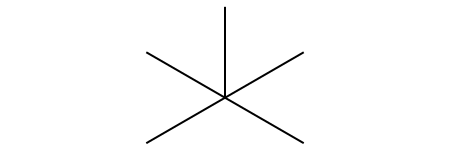

In [12]:
# We can choose to opt out of rdkit's chemical validity checks by using sanitize = False.
#This is normally not necessary, and should only be done with caution.

chemically_invalid = "C(C)(C)(C)(C)(C)"
mol = Chem.MolFromSmiles(chemically_invalid, sanitize = False)
print(mol)
mol

In [13]:
#Write a function called canonicalize_smiles. 
#Make sure your function can handle invalid smiles with a helpful error message.

def canonicalize_smiles(smiles: str) -> str:
    if not isinstance(smiles, str):
        raise TypeError(f"Invalid type {type(smiles)}: smiles must be a string")
    
    mol = Chem.MolFromSmiles(smiles)

    if mol is None:
        raise ValueError(f"Could not convert smiles to mol")

    return Chem.MolToSmiles(mol)

In [14]:
# examples : 

In [15]:
canonicalize_smiles("CO(C)(C)(C)")

[19:12:13] Explicit valence for atom # 1 O, 4, is greater than permitted


ValueError: Could not convert smiles to mol

In [16]:
canonicalize_smiles("123")

[19:12:22] SMILES Parse Error: syntax error while parsing: 123
[19:12:22] SMILES Parse Error: Failed parsing SMILES '123' for input: '123'


ValueError: Could not convert smiles to mol

In [20]:
canonicalize_smiles("CCO")


'CCO'

In [21]:
canonicalize_smiles("OCC")

'CCO'

InChI:  InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)
InChI Key:  BSYNRYMUTXBXSQ-UHFFFAOYSA-N


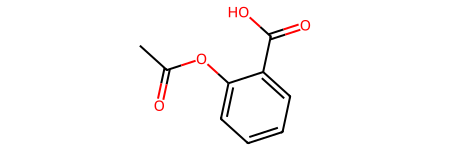

In [22]:
# We can use similar syntax to convert a mol object to and from other textual 
#representations, like Inchi and InchiKey.

aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
aspirin = Chem.MolFromSmiles(aspirin_smiles)
print("InChI: ", Chem.MolToInchi(aspirin))
print("InChI Key: ", Chem.InchiToInchiKey(Chem.MolToInchi(aspirin)))

aspirin_inchi = "InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)"
aspirin = Chem.MolFromInchi(aspirin_inchi)
aspirin

In [23]:
"""
Textual representations like smiles and Inchi have their uses. However, they cannot capture any of the 3D 
information that is crucial for so much chemistry. Other data formats have been devised, including SDF 
(e.g. the mol format). Rdkit lets us work with these too! Essentially, the SDF format encodes the coordinates 
of each atom, as well as the connectivity between atoms. More details can be found here: 
https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/02%3A_Representing_Small_Molecules_on_Computers/2.05%3A_Structural_Data_Files
"""

'\nTextual representations like smiles and Inchi have their uses. However, they cannot capture any of the 3D \ninformation that is crucial for so much chemistry. Other data formats have been devised, including SDF \n(e.g. the mol format). Rdkit lets us work with these too! Essentially, the SDF format encodes the coordinates \nof each atom, as well as the connectivity between atoms. More details can be found here: \nhttps://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/02%3A_Representing_Small_Molecules_on_Computers/2.05%3A_Structural_Data_Files\n'

In [24]:
aspirin_2d = Chem.MolToMolBlock(aspirin)
print("SDF format: ", aspirin_2d)

"""
Notice how the third column of numbers is all 0.000. This molecule only has 2D coordinates. 
This is rdkit's default representation. However, rdkit enables us to come up with quite reasonable 
3D coordinates based on the ETKDG method 
(more info available at https://www.rdkit.org/docs/GettingStartedInPython.html under the "Working with 3D molecules" section).
"""

SDF format:  
     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
   -5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  6  1  0

In [25]:
from rdkit.Chem import AllChem
# Le module AllChem fournit des fonctionnalités supplémentaires pour la chimie computationnelle, 
#y compris des opérations de conversion de structure, de calcul de descripteurs moléculaires, et bien 
#plus encore.

aspirin_3d = Chem.AddHs(aspirin)
# La fonction AddHs() ajoute des hydrogènes pour rendre la représentation moléculaire de l'aspirine plus 
#complète, ce qui est souvent nécessaire pour certaines opérations de manipulation ou de calcul ultérieures
AllChem.EmbedMolecule(aspirin_3d)
# Cette ligne effectue une incorporation (ou « embedding ») tridimensionnelle de la molécule d'aspirine.
print(Chem.MolToMolBlock(aspirin_3d))
# La fonction MolToMolBlock() convertit la molécule RDKit en une chaîne de caractères représentant la 
#structure moléculaire au format Mol, qui est ensuite imprimée. Cela peut être utile pour visualiser ou 
#sauvegarder la structure moléculaire dans un format standardisé.


     RDKit          3D

 21 21  0  0  0  0  0  0  0  0999 V2000
    3.3498    1.2886    0.2390 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3584   -1.8640   -0.4463 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2116   -2.5895   -0.1812 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2842   -0.4993   -0.3191 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0519   -1.9490    0.1939 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1336    0.5522   -0.2016 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1016    0.1240    0.0612 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0479   -0.6034    0.3269 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0650    1.5736    0.1845 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8662    0.2994   -1.3866 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0102    2.1625    0.5263 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2033    2.3235   -0.0762 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.1899    0.0847    0.7008 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.1957    1.0971   -0

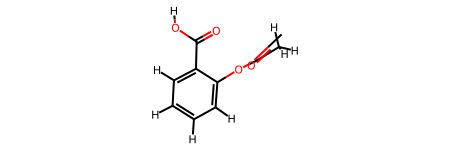

In [26]:
# Up until now, we've been working with chunks of text. We might want to read from files directly. 
#Rdkit makes this easy!

aspirin_3d

In [27]:
# Write to a mol file
Chem.MolToMolFile(aspirin_3d, "aspirin.mol")

In [28]:
# Alternative write
with open("aspirin.mol", "w") as file:
    file.write(Chem.MolToMolBlock(aspirin_3d))

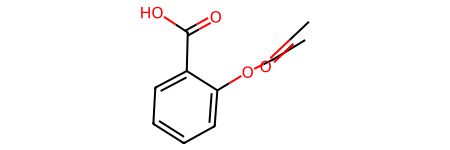

In [29]:
# Read from a mol file 
Chem.MolFromMolFile("aspirin.mol")

In [30]:
# Alternative read
with open("aspirin.mol", "r") as file:
     mol_block = file.read()
     aspirin_mol = Chem.MolFromMolBlock(mol_block)

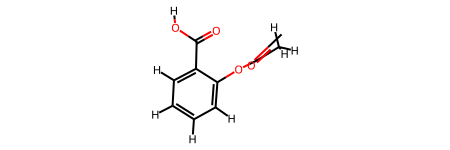

In [31]:
# The default rdkit behavior is to show the molecule with implicit hydrogens. We can change this behavior if we want to.

Chem.MolFromMolFile("aspirin.mol", removeHs = False)

In [32]:
# Rdkit's 3D rendering abilitiy leaves something to be desired. To better understand the 3D structure of 
#our molecule, we can use a convenient library called py3Dmol

import py3Dmol

# Helpful function from a blog (https://rdkit.blogspot.com/2016/07/a-recent-post-on-in-pipeline-talked.html)
def drawit(m,p=None,confId=-1):
        mb = Chem.MolToMolBlock(m,confId=confId)
        if p is None:
            p = py3Dmol.view(width=400,height=400)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

drawit(aspirin_3d)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

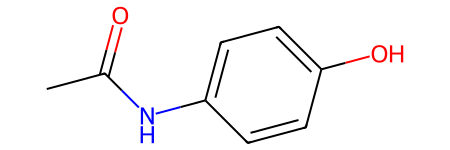

In [33]:
## Working with Mol objects

# Rdkit's mol objects are an intuitive way to store chemical information. Just like we think of molecules 
#as a collection of atoms and a collection of bonds, an rdkit mol object is composed of atom objects and 
#bond objects.

tylenol_smiles = "CC(=O)NC1=CC=C(C=C1)O"
tylenol = Chem.MolFromSmiles(tylenol_smiles)
tylenol 

In [35]:
# How many atoms are there in tylenol? Bonds?

print("Number of atoms: ", tylenol.GetNumAtoms())
print("Number of bonds: ", tylenol.GetNumBonds())

# You might be surprised to notice that rdkit only counts the number of heavy atoms (not H).

Number of atoms:  11
Number of bonds:  11


In [36]:
print("Number of atoms: ", tylenol.GetNumAtoms(onlyExplicit = False))
print("Number of bonds: ", tylenol.GetNumBonds(onlyHeavy = False))

Number of atoms:  20
Number of bonds:  20


In [37]:
# To get the atom or bond objects from an rdkit mol object, 
#we can use the mol.GetAtoms() or mol.GetBonds() methods.
print(tylenol.GetAtoms())
print(tylenol.GetBonds())

In [40]:
# These yield iterators. We can access individual atoms using with for loops. 
#Each atom and bond holds a lot of information.

# Taking inspiration from the lecture, print the symbol, atomic number, index, degree, valence, 
#and hybridization of each atomn in tylenol.

for atom in tylenol.GetAtoms():
    print(f"Atom: {atom.GetSymbol()}")
    print(f"Atomic Number: {atom.GetAtomicNum()}")
    print(f"Atom Index: {atom.GetIdx()}")
    print(f"Degree (number of neighbors): {atom.GetDegree()}")
    print(f"Valence: {atom.GetTotalValence()}")
    print(f"Hybridization: {atom.GetHybridization()}")
    print("-----------------------------------------")

Atom: C
Atomic Number: 6
Atom Index: 0
Degree (number of neighbors): 1
Valence: 4
Hybridization: SP3
-----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 1
Degree (number of neighbors): 3
Valence: 4
Hybridization: SP2
-----------------------------------------
Atom: O
Atomic Number: 8
Atom Index: 2
Degree (number of neighbors): 1
Valence: 2
Hybridization: SP2
-----------------------------------------
Atom: N
Atomic Number: 7
Atom Index: 3
Degree (number of neighbors): 2
Valence: 3
Hybridization: SP2
-----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 4
Degree (number of neighbors): 3
Valence: 4
Hybridization: SP2
-----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 5
Degree (number of neighbors): 2
Valence: 4
Hybridization: SP2
-----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 6
Degree (number of neighbors): 2
Valence: 4
Hybridization: SP2
-----------------------------------------

In [41]:
# Let's look at what kind of bond information we have.

tylenol.GetBonds()

for bond in tylenol.GetBonds():
    print(f"Bond: {bond.GetBondType()}")
    print(f"Bond Index: {bond.GetIdx()}")
    print(f"Atom 1: {bond.GetBeginAtomIdx()}")
    print(f"Atom 2: {bond.GetEndAtomIdx()}")
    print(f"Is Conjugated: {bond.GetIsConjugated()}")
    print(f"Is Aromatic: {bond.GetIsAromatic()}")
    print("-----------------------------------------")

Bond: SINGLE
Bond Index: 0
Atom 1: 0
Atom 2: 1
Is Conjugated: False
Is Aromatic: False
-----------------------------------------
Bond: DOUBLE
Bond Index: 1
Atom 1: 1
Atom 2: 2
Is Conjugated: True
Is Aromatic: False
-----------------------------------------
Bond: SINGLE
Bond Index: 2
Atom 1: 1
Atom 2: 3
Is Conjugated: True
Is Aromatic: False
-----------------------------------------
Bond: SINGLE
Bond Index: 3
Atom 1: 3
Atom 2: 4
Is Conjugated: True
Is Aromatic: False
-----------------------------------------
Bond: AROMATIC
Bond Index: 4
Atom 1: 4
Atom 2: 5
Is Conjugated: True
Is Aromatic: True
-----------------------------------------
Bond: AROMATIC
Bond Index: 5
Atom 1: 5
Atom 2: 6
Is Conjugated: True
Is Aromatic: True
-----------------------------------------
Bond: AROMATIC
Bond Index: 6
Atom 1: 6
Atom 2: 7
Is Conjugated: True
Is Aromatic: True
-----------------------------------------
Bond: AROMATIC
Bond Index: 7
Atom 1: 7
Atom 2: 8
Is Conjugated: True
Is Aromatic: True
-------------

In [42]:
# Each atom keeps track of its neighbors. We can access both bonds and atoms by index.

N = tylenol.GetAtomWithIdx(3)
print(f"Atom: {N.GetSymbol()}")

for neighbor in N.GetNeighbors():
    print(f"Neighbor: {neighbor.GetIdx()} {neighbor.GetSymbol()}")

Atom: N
Neighbor: 1 C
Neighbor: 4 C


In [46]:
# Access with start and end atom indexes

print("C-N bond order: ", tylenol.GetBondBetweenAtoms(3, 4).GetBondType())

C-N bond order:  SINGLE


In [47]:
# Access with bond index

print("Begin atom index: ", tylenol.GetBondWithIdx(3).GetBeginAtomIdx())
print("End atom index: ", tylenol.GetBondWithIdx(3).GetEndAtomIdx())
print("C-N bond order: ", tylenol.GetBondWithIdx(3).GetBondType())

Begin atom index:  3
End atom index:  4
C-N bond order:  SINGLE


In [48]:
# Your turn! Identify the index of the nitrogen in clavulanic acid O=C2N1[C@H](C(/O[C@@H]1C2)=C/CO)C(=O)O. 
#Find the degree and hybridization of the nitrogen. Find the index of each neighbor, and print the bond type.

clavulanic_acid_smiles = "O=C2N1[C@H](C(/O[C@@H]1C2)=C/CO)C(=O)O"
clavulanic_acid = Chem.MolFromSmiles(clavulanic_acid_smiles)

# Get the atoms, get the index of the atom with the symbol "N"
for atom in clavulanic_acid.GetAtoms():
    if atom.GetSymbol() == "N": 
        n_idx = atom.GetIdx()

N = clavulanic_acid.GetAtomWithIdx(n_idx)

print(f"Atom: {N.GetSymbol()}, Index: {N.GetIdx()},  Hybridization: {N.GetHybridization()}, Degree: {N.GetDegree()}")

# Get the neighbors 
for neighbor in N.GetNeighbors():
    print(f"Neighbor: {neighbor.GetIdx()} {neighbor.GetSymbol()}")
    print(f"Bond: {clavulanic_acid.GetBondBetweenAtoms(N.GetIdx(), neighbor.GetIdx()).GetBondType()}")

Atom: N, Index: 2,  Hybridization: SP2, Degree: 3
Neighbor: 1 C
Bond: SINGLE
Neighbor: 3 C
Bond: SINGLE
Neighbor: 6 C
Bond: SINGLE


In [49]:
clavulanic_acid_3d = Chem.AddHs(clavulanic_acid)
AllChem.EmbedMolecule(clavulanic_acid_3d)
print(Chem.MolToMolBlock(clavulanic_acid_3d))

def drawit(m,p=None,confId=-1):
        mb = Chem.MolToMolBlock(m,confId=confId)
        if p is None:
            p = py3Dmol.view(width=400,height=400)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

drawit(clavulanic_acid_3d)


     RDKit          3D

 23 24  0  0  0  0  0  0  0  0999 V2000
   -3.5198   -0.9276   -2.3084 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6170   -0.8817   -1.4380 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4679   -0.1340   -1.1030 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3232    0.7356   -1.1036 C   0  0  2  0  0  0  0  0  0  0  0  0
    0.6413   -0.0401   -0.2759 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1247   -1.0162    0.3919 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4965   -0.6742    0.2709 C   0  0  2  0  0  0  0  0  0  0  0  0
   -2.4091   -1.7654   -0.2351 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.9494    0.0866   -0.1343 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7625   -0.7850    0.7447 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4223   -0.0630    1.7373 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6923    1.9804   -0.3825 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8363    2.1524    0.1089 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.2447    3.0073   -0

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

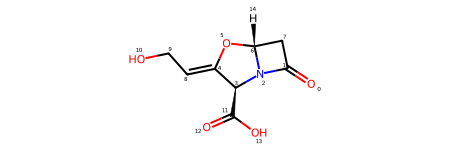

In [50]:
# It would be nice to check our answers and see atom indexes on the molecule. We can do this 
#by setting changing the settings on IPythonConsole.


IPythonConsole.drawOptions.addAtomIndices = True
clavulanic_acid


In [51]:
## Descriptors 
"""
Molecular descriptors are numerical representations of chemical structures and properties. They can come 
from the molecular formula, the molecule's size and shape, or even its electronic structure.

We're going to calculate some descriptors of some drug molecules, downloaded from the Chembl database 
(https://www.ebi.ac.uk/chembl/). This will be a great chance to practice all of those pandas skills you 
learned in week 4!

Read in the database. How many entries are there? How many columns? What data does it contain? 
(Note that the dataset has the separator ";" instead of ",").
"""
import pandas as pd

drugs = pd.read_csv("chembl_drugs.csv", sep= ";")

print("Shape", drugs.shape)
print("Columns", drugs.columns)

FileNotFoundError: [Errno 2] No such file or directory: 'chembl_drugs.csv'